In [148]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

**Base de dados**

In [89]:
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span style="font-size: 14px;">

- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [91]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [92]:
df.shape

(2040, 4)

In [93]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [94]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2040.000000,2040.000000,2040.000000,2.040000e+03
mean,6.346742,7.552059,17.696863,5.384817e+05
std,0.486539,5.662059,1.694193,1.506652e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.030750,3.740000,16.600000,4.389000e+05
50%,6.345000,4.600000,16.600000,5.250000e+05
75%,6.635000,9.597500,19.600000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [95]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["hotpink"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [96]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["royalblue"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [97]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["seagreen"])
boxplot.show()

**Valor médio das casas**

In [98]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

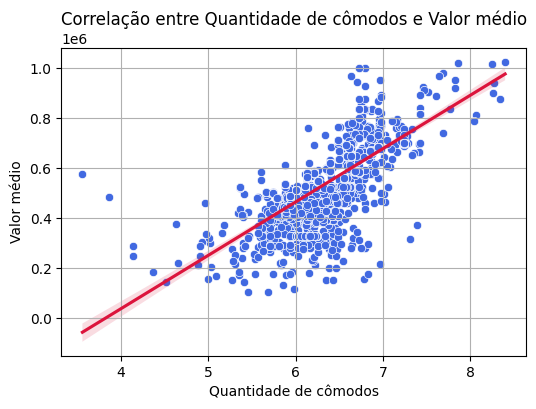

In [99]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='royalblue')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='crimson')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

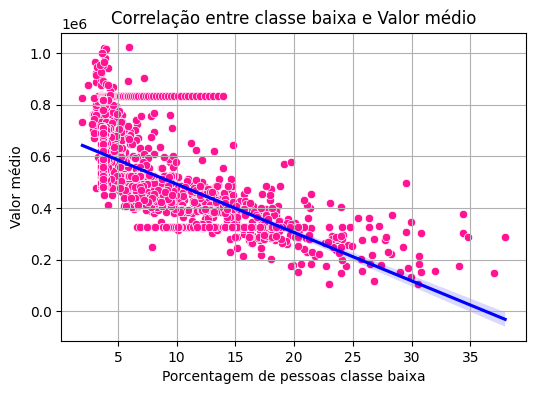

In [100]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='deeppink')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

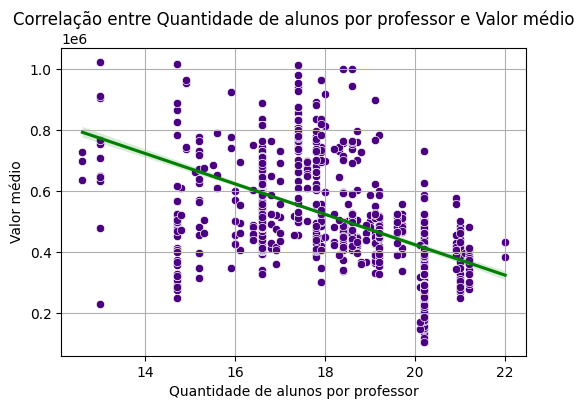

In [101]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='indigo')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

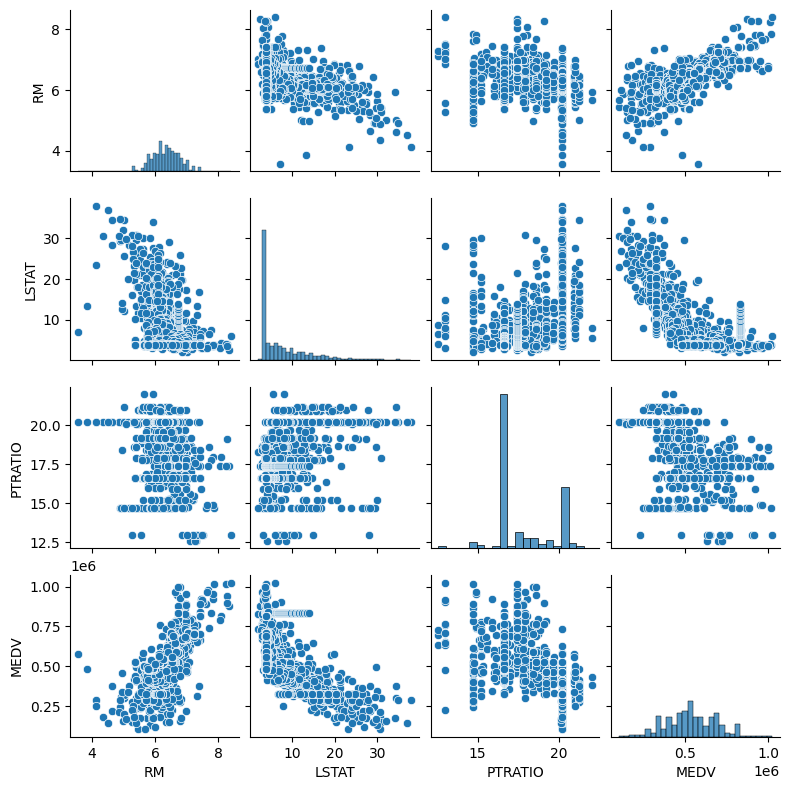

In [102]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

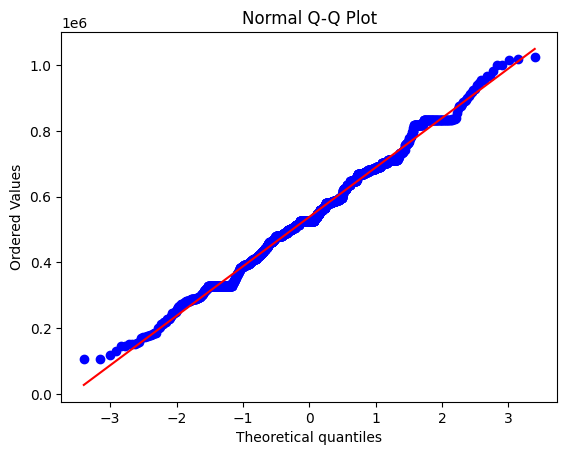

In [103]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [104]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

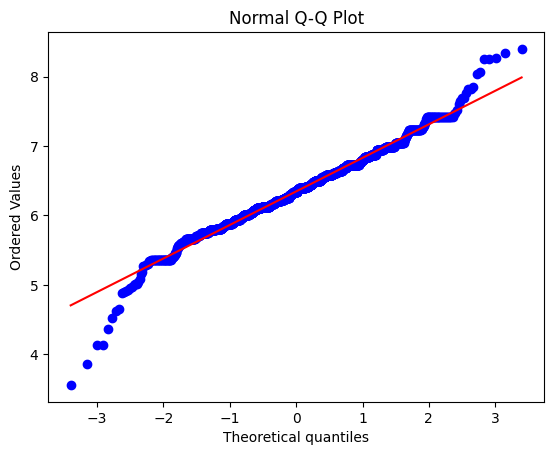

In [105]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [106]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

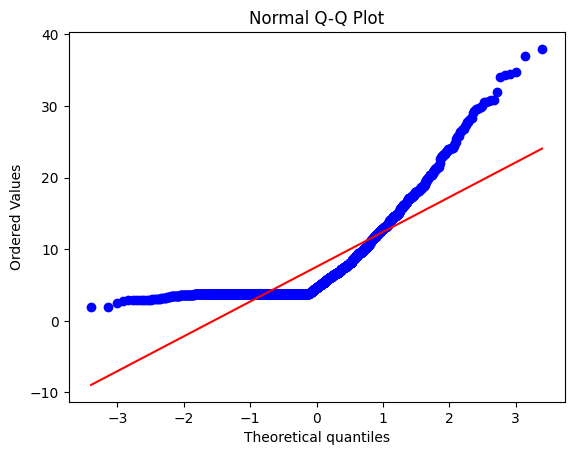

In [107]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [108]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

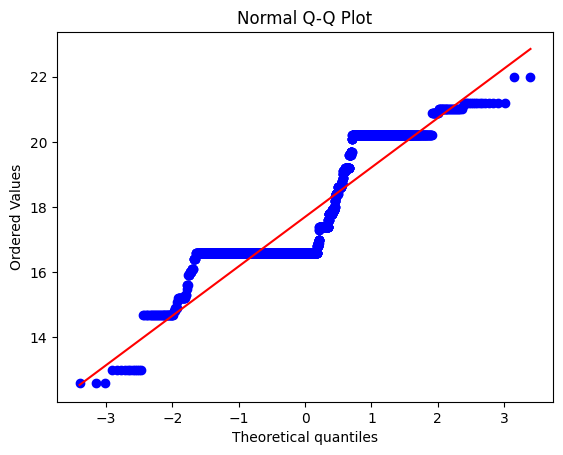

In [109]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [110]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [111]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9929
p-valor: 2.4426e-08


In [112]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0587
p-valor: 1.0000e-03


**RM**

In [113]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9832
p-valor: 9.1086e-15


In [114]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0436
p-valor: 1.0000e-03


**LSTAT**

In [115]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7334
p-valor: 3.2744e-49


In [116]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2235
p-valor: 1.0000e-03


**PTRATIO**

In [117]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8002
p-valor: 1.2662e-44


In [118]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3139
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [119]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.69
p-valor: 1.04e-286


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [120]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [121]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 8.53e-274


In [122]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.325439,-0.157697,0.727600
LSTAT,-0.325439,1.000000,0.642415,-0.703269
PTRATIO,-0.157697,0.642415,1.000000,-0.508757
MEDV,0.727600,-0.703269,-0.508757,1.000000


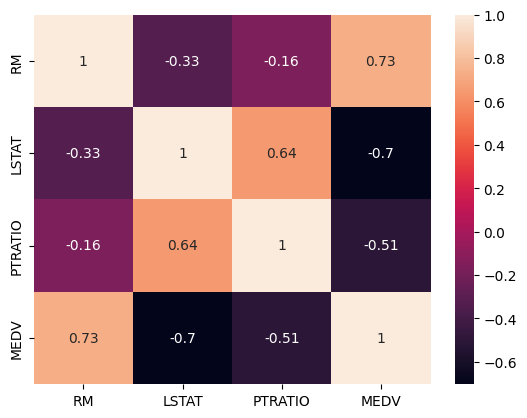

In [123]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Regressão Linear Simples #

## Análise dos dados e separação de x e y ##

In [124]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [125]:
x1 = df.iloc[:, 0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       ...,
       [6.678],
       [6.549],
       [5.79 ]])

In [126]:
y = df.iloc[:, 3].values
y

array([504000., 453600., 728700., ..., 588600., 558600., 481800.])

## Separação da base de treino e teste ##

In [127]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y, test_size = 0.3, random_state = 5
)

In [128]:
x_train.shape, y_train.shape

((1428, 1), (1428,))

In [129]:
x_test.shape, y_test.shape

((612, 1), (612,))

## Algoritmo da regressão linear ##

In [130]:
reg_linear = LinearRegression()
reg_linear.fit(x_train, y_train);

**Intercepto (coeficiente linear)**

In [131]:
reg_linear.intercept_

-805128.5964365043

**Coeficiente Angular**

In [132]:
reg_linear.coef_

array([211280.90032266])

### Resultado da equação: ###
<span style="font-size: 14px; font-family: monospace;">

$ \text{Valor médio da casa} = -805128.5964365043 + 211280.90032266 \times \text{número de cômodos} $

</span>

### Coeficiente de determinação ###
<span style="font-size: 14px;">Medida estatística que indica o quanto a variabilidade de uma variável dependente é explicada pelos valores da variável independente em um modelo de regressão. </br>
Quanto mais próximo de 1, melhor o modelo explica a variação na variável dependente.
</span>


**Coeficiente de Determinação para os dados de treino**

In [133]:
r2_train = reg_linear.score(x_train, y_train)
print("%.2f%%" % (r2_train * 100.0))

47.38%


**Coeficiente de Determinação para os dados de teste**

In [134]:
r2_test = reg_linear.score(x_test, y_test)
print("%.2f%%" % (r2_test * 100.0))

47.20%


### Previsões ###

In [135]:
previsoes_train = reg_linear.predict(x_train)

#### Gráfico de dispersão ####

**Dados de treino**

Text(0.5, 0, 'Quantidade de cômodos')

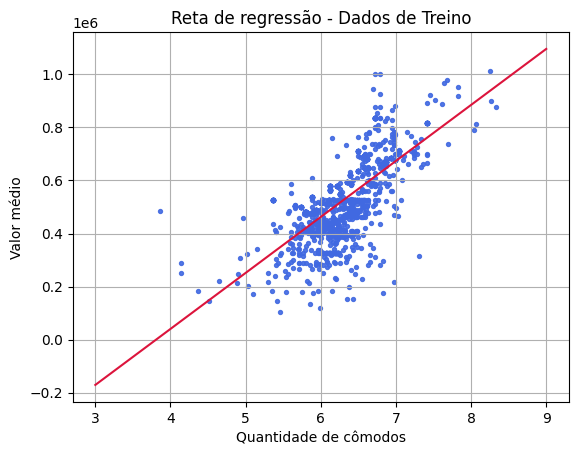

In [136]:
plt.scatter(
    y = y_train, x = x_train, color = 'royalblue',
    s = 8, alpha = 0.9
)
x_plot = np.linspace(3, 9)
plt.plot(
    x_plot,
    x_plot * reg_linear.coef_ + reg_linear.intercept_,
    color = 'crimson'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Treino')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade de cômodos')

**Dados de teste**

In [137]:
previsoes_test = reg_linear.predict(x_test)

Text(0.5, 0, 'Quantidade de cômodos')

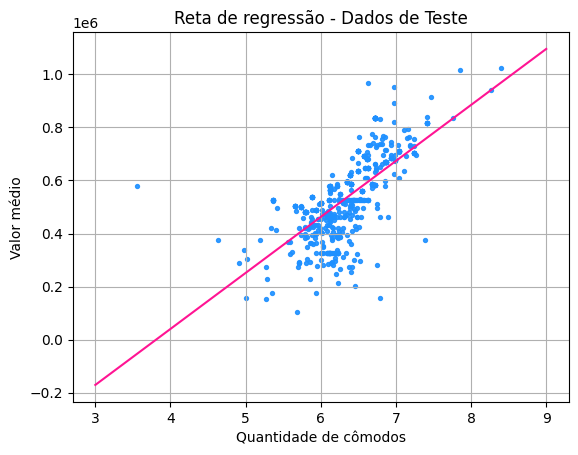

In [138]:
plt.scatter(
    y = y_test, x = x_test, color = 'dodgerblue',
    s = 8, alpha = 0.9
)
x_plot = np.linspace(3, 9)
plt.plot(
    x_plot,
    x_plot * reg_linear.coef_ + reg_linear.intercept_,
    color = 'deeppink'
)
plt.grid(True)
plt.title('Reta de regressão - Dados de Teste')
plt.ylabel('Valor médio')
plt.xlabel('Quantidade de cômodos')

In [146]:
#Fazendo previsões para valores de cômodos distintos
valor_casa = reg_linear.predict([[4]])
print('Valor da casa: US$ {:.2f}'.format(float(valor_casa)))

Valor da casa: US$ 39995.00


### Métricas de desempenho ###

**Erro Absoluto**

In [161]:
print("Erro absoluto: {:.2f}".format(abs(y_test - previsoes_test).mean()))

Erro absoluto: 85628.24


**Erro médio Absoluto**

In [155]:
print("Erro médio absoluto: {:.2f}".format(mean_absolute_error(y_test, previsoes_test)))

Erro médio absoluto: 85628.24


**Erro quadrático médio**

In [156]:
print("Erro quadrático médio: {:.2f}".format(mean_squared_error(y_test, previsoes_test)))

Erro quadrático médio: 12561974906.16


**Raiz do erro quadrático médio**

In [157]:
print("Raiz quadrático médio: {:.2f}".format(np.sqrt(mean_squared_error(y_test, previsoes_test))))

Raiz quadrático médio: 112080.22
